In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
players_df =  pd.read_csv('dataset/FIFA_22/players_22.csv')

C:\Users\Firmin\AppData\Local\Temp\ipykernel_15420\195604370.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players_df =  pd.read_csv('dataset/FIFA_22/players_22.csv')


In [3]:
players_df
#

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [4]:
features = ['overall',  'potential', 'wage_eur', 'value_eur', 'age'] 

In [5]:
players_df = players_df.dropna(subset=features)

In [6]:
data = players_df[features].copy()

In [7]:
print(data)
data.describe()


       overall  potential  wage_eur    value_eur  age
0           93         93  320000.0   78000000.0   34
1           92         92  270000.0  119500000.0   32
2           91         91  270000.0   45000000.0   36
3           91         91  270000.0  129000000.0   29
4           91         91  350000.0  125500000.0   30
...        ...        ...       ...          ...  ...
19234       47         52    1000.0      70000.0   22
19235       47         59     500.0     110000.0   19
19236       47         55     500.0     100000.0   21
19237       47         60     500.0     110000.0   19
19238       47         60     500.0     110000.0   19

[19165 rows x 5 columns]


,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,1.916500e+04,19165.000000
mean,65.760188,71.079990,9021.721889,2.850452e+06,25.190034
std,6.882803,6.087721,19476.005074,7.613700e+06,4.727515
min,47.000000,49.000000,500.000000,9.000000e+03,16.000000
25%,61.000000,67.000000,1000.000000,4.750000e+05,21.000000
50%,66.000000,71.000000,3000.000000,9.750000e+05,25.000000
75%,70.000000,75.000000,8000.000000,2.000000e+06,29.000000
max,93.000000,95.000000,350000.000000,1.940000e+08,43.000000


1- Scale data
2- Initialize random centroids
3- Assign each data point to the cluster
4- Update  the centroid of each cluster by taking the average
5- Repeat steps 3 and 4 until centroids stop changing

In [8]:
data = (data - data.min()) /  (data.max() - data.min()) * 9 + 1
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [9]:
data.head(10)

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667
5,9.608696,9.608696,4.334764,6.195700,5.000000
6,9.608696,10.000000,6.909871,10.000000,3.000000
7,9.413043,9.021739,3.201717,1.625900,7.333333
8,9.413043,9.413043,7.424893,5.592579,5.333333
9,9.413043,9.021739,7.167382,7.007593,4.666667


In [10]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [11]:
centroids = random_centroids(data, 5)

C:\Users\Firmin\AppData\Local\Temp\ipykernel_15420\1845334667.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [12]:
centroids

,0,1,2,3,4
overall,3.152174,5.304348,6.086957,3.739130,6.869565
potential,4.913043,5.695652,5.108696,7.260870,4.521739
wage_eur,1.064378,1.038627,1.476395,1.218884,1.038627
value_eur,1.006542,1.073813,1.073813,1.064534,1.064534
age,5.333333,3.000000,3.333333,3.000000,3.666667


In [13]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)
    

In [14]:
labels = get_labels(data, centroids)

In [15]:
labels.value_counts()

0    6501
1    6225
2    3522
3    2428
4     489
Name: count, dtype: int64

In [16]:
def news_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [17]:
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [18]:
def plot_clusters(data, labels, centroids, iterations):
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data)
    centroids_pca = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.figure(figsize=(10, 8))
    plt.title(f'Iteration{iterations}')
    plt.scatter(x=data_pca[:,0], y=data_pca[:,1], c = labels)
    plt.scatter(x=centroids_pca[:,0], y = centroids_pca[:,1])
    plt.show()

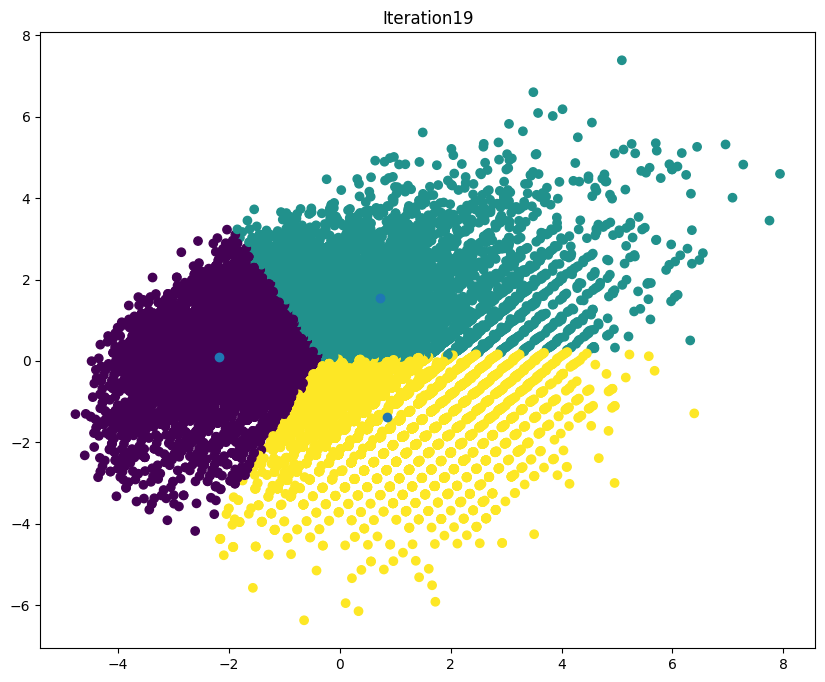

In [19]:
max_iterations =  100
k = 3

                     #centroids_count
centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1
while iteration < max_iterations and not  centroids.equals(old_centroids):
    old_centroids=centroids

    labels = get_labels(data, centroids)
    centroids = news_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [20]:
centroids

,0,1,2
overall,3.205672,5.807503,4.781960
potential,4.930905,6.497870,4.506813
wage_eur,1.028564,1.420500,1.118498
value_eur,1.026655,1.285685,1.044909
age,2.514741,3.598215,5.467648


In [21]:
players_df[labels == 0][['short_name'] + features]

,short_name,overall,potential,wage_eur,value_eur,age
7025,Sandeiro Leal,68,68,7000.0,1400000.0,21
8028,Narcisso Mau,67,67,4000.0,1100000.0,21
8029,Botelhinonsa,67,67,4000.0,1100000.0,21
8030,Edenildo Lagoas,67,67,3000.0,1100000.0,21
8040,Dener Rolim,67,67,4000.0,1200000.0,21
...,...,...,...,...,...,...
19234,Song Defu,47,52,1000.0,70000.0,22
19235,C. Porter,47,59,500.0,110000.0,19
19236,N. Logue,47,55,500.0,100000.0,21
19237,L. Rudden,47,60,500.0,110000.0,19


In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(3)
kmeans.fit(data)


KMeans(n_clusters=3)

In [24]:
centroids = kmeans.cluster_centers_

In [25]:
pd.DataFrame(centroids,  columns=features).T

,0,1,2
overall,4.806501,6.205557,3.586928
potential,4.505295,6.609269,5.193424
wage_eur,1.113934,1.645990,1.039228
value_eur,1.040121,1.407499,1.035187
age,5.624668,4.115589,2.713579


KNN : Kneigbors

In [26]:
knn_df = pd.read_csv('ushape', header=None)

FileNotFoundError: [Errno 2] No such file or directory: 'ushape'

In [ ]:
X = knn_df[[0,1]].values
Y = knn_df[2].values

In [ ]:
class KNN:
    def __init__(self, k):
        self.k = 3
    
    def fit(self, x_train, y_train):
        #stoquer le jeu d'entrainement
        self.x_trains = x_train
        self.y_trains = y_train
    
    def  predict(self,x):
        #trouver les k plus proches voisins de l'objet à prédire
        distances = [distances(x, x_train) for x_train in self.x_trains]
        nearest_neighbors = sorted


    @staticmethod
    def distance_euclidean(v1, v2):
        distances = 0
        for i, j in zip(v1, v2):
            distances += (i - j) ** 2
            return distances ** 0.5